In [1]:
import requests
from bs4 import BeautifulSoup
import csv

In [2]:
link_base="https://360boutique.vn/cua-hang/"
list_link=[]
for one in range(1,23):
  item=link_base+ 'page/'+str(one)
  list_link.append(item)
print(list_link)

['https://360boutique.vn/cua-hang/page/1', 'https://360boutique.vn/cua-hang/page/2', 'https://360boutique.vn/cua-hang/page/3', 'https://360boutique.vn/cua-hang/page/4', 'https://360boutique.vn/cua-hang/page/5', 'https://360boutique.vn/cua-hang/page/6', 'https://360boutique.vn/cua-hang/page/7', 'https://360boutique.vn/cua-hang/page/8', 'https://360boutique.vn/cua-hang/page/9', 'https://360boutique.vn/cua-hang/page/10', 'https://360boutique.vn/cua-hang/page/11', 'https://360boutique.vn/cua-hang/page/12', 'https://360boutique.vn/cua-hang/page/13', 'https://360boutique.vn/cua-hang/page/14', 'https://360boutique.vn/cua-hang/page/15', 'https://360boutique.vn/cua-hang/page/16', 'https://360boutique.vn/cua-hang/page/17', 'https://360boutique.vn/cua-hang/page/18', 'https://360boutique.vn/cua-hang/page/19', 'https://360boutique.vn/cua-hang/page/20', 'https://360boutique.vn/cua-hang/page/21', 'https://360boutique.vn/cua-hang/page/22']


In [3]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
f=open("output1.csv","a")

Name='Name'
Img='Image'
Price='Price'
fields =f"{Name}, {Img}, {Price},\n"
f.write(fields)

for i in range(len(list_link)):
  link = list_link[i]
  r= requests.get(link,headers=headers)  # một số web ktra robot fake id lại = header
  crawl=BeautifulSoup(r.text,'html.parser')
  product_data=crawl.find_all("div", class_="col-md-3 col-sm-6 col-xs-6 pro-loop col-5")  
  for j in product_data:
    img = j.find('a').find('img')['src']
    name  = j.find('a').find('img')['alt']
    price = j.find('p').find('bdi').text
    str=f"{name}, {img}, {price},\n" 
    f.write(str)
f.close

<function TextIOWrapper.close>

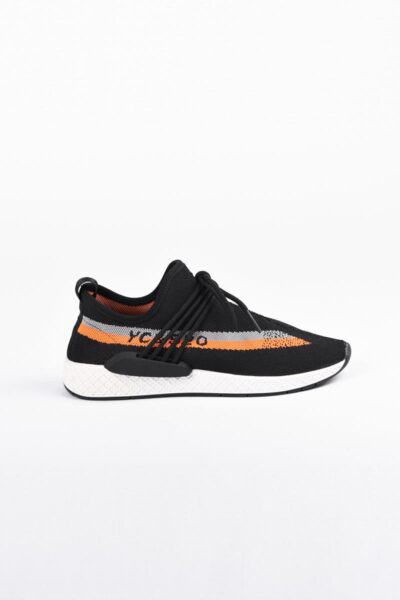

In [4]:
#In ảnh từ link 
from PIL import Image
import requests
from io import BytesIO
response = requests.get('https://360boutique.vn/wp-content/uploads/2018/08/G1011-750k-1-copy-Copy-400x600.jpg')
img = Image.open(BytesIO(response.content))
img